In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import nuwe_resources.ml_lib as ml

from sklearn.preprocessing import MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

#from sklearn.metrics import f1_score, confusion_matrix, cohen_kappa_score,\
#                            accuracy_score, precision_score, recall_score, make_scorer

#import seaborn as sns


#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,114.0,14.080561,3.098263,8.597000,11.697500,13.500000,16.045000,25.73000
texture_mean,114.0,19.223246,4.451322,10.380000,16.040000,18.760000,21.780000,33.81000
perimeter_mean,114.0,91.502018,21.375850,54.090000,75.582500,87.470000,105.550000,174.20000
area_mean,114.0,643.151754,302.252445,221.200000,421.475000,555.150000,801.075000,2010.00000
smoothness_mean,114.0,0.094411,0.014287,0.064290,0.083950,0.092455,0.102250,0.14250
compactness_mean,114.0,0.099489,0.052283,0.023440,0.061023,0.085920,0.127825,0.28390
concavity_mean,114.0,0.080914,0.074235,0.000000,0.025683,0.054505,0.110250,0.33680
concave points_mean,114.0,0.046263,0.037399,0.000000,0.018045,0.032100,0.065710,0.19130
symmetry_mean,114.0,0.180534,0.028599,0.106000,0.161725,0.176700,0.195175,0.27430
fractal_dimension_mean,114.0,0.062289,0.007128,0.050240,0.056755,0.061460,0.065458,0.09744


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,455.0,0.373626,0.484299,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,455.0,14.139000,3.625935,6.981000,11.705000,13.300000,15.740000,28.11000
texture_mean,455.0,19.306286,4.267421,9.710000,16.210000,18.890000,21.795000,39.28000
perimeter_mean,455.0,92.086044,24.998077,43.790000,75.015000,85.980000,103.650000,188.50000
area_mean,455.0,657.829890,363.536865,143.500000,419.250000,546.400000,777.250000,2501.00000
smoothness_mean,455.0,0.096849,0.013981,0.052630,0.086740,0.096860,0.106050,0.16340
compactness_mean,455.0,0.105557,0.052932,0.019380,0.066735,0.094860,0.130450,0.34540
concavity_mean,455.0,0.090775,0.080993,0.000000,0.030180,0.063870,0.132200,0.42680
concave points_mean,455.0,0.049585,0.039159,0.000000,0.020720,0.033840,0.074490,0.20120
symmetry_mean,455.0,0.181319,0.027140,0.116700,0.162050,0.179700,0.195800,0.30400


radius_mean
symmetry_mean


C:\Users\botic\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


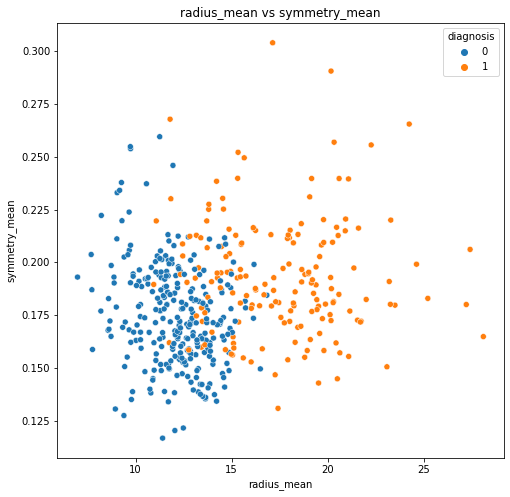

In [5]:
ml.print_scatter(train.radius_mean, train.symmetry_mean, train.diagnosis)

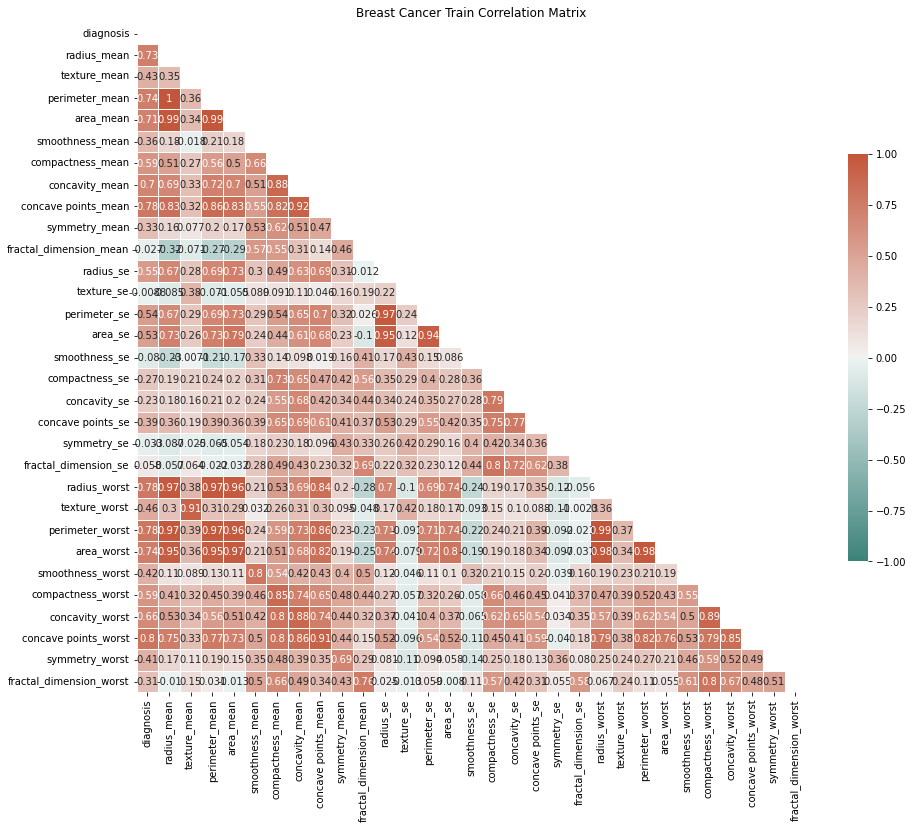

In [6]:
ml.print_correlation(train, 'Breast Cancer Train')

In [7]:
train.diagnosis.value_counts()

0    285
1    170
Name: diagnosis, dtype: int64

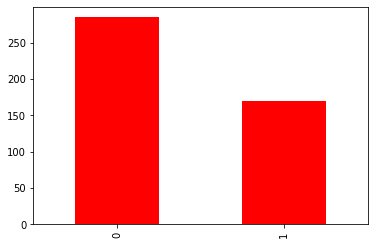

In [8]:
train.diagnosis.value_counts().plot(kind='bar', color='red');

## Initialize models

In [9]:
rf = RandomForestClassifier()
lr = LogisticRegression(max_iter=2000,class_weight='balanced')
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
lgbm = LGBMClassifier()
cat = CatBoostClassifier(verbose=0)
ada = AdaBoostClassifier()


models = [rf, xgb, xgbrf, lgbm, cat, ada]
final = [lr]

model_list=[models, final]

## Trying with only 2 features

In [10]:
X = train[['radius_mean','symmetry_mean']]
y = train.diagnosis
test = test[['radius_mean','symmetry_mean']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y, test_size=.2)

In [13]:
preds_2_feact = ml.train_stack_model(model_list, X_train, y_train, X_test, y_test, test)

 17%|█▋        | 1/6 [00:00<00:00,  9.43it/s]

Training RandomForestCl
f1_score on train of RandomForestCl: 1.0

f1_score on validation of RandomForestCl: 0.8508196721311476
Training XGBClassifier(
f1_score on train of XGBClassifier(: 1.0

f1_score on validation of XGBClassifier(: 0.8259562841530055
Training XGBRFClassifie
Training LGBMClassifier
f1_score on train of LGBMClassifier: 1.0

f1_score on validation of LGBMClassifier: 0.8643815201192251
Training catboost



 50%|█████     | 1/2 [00:01<00:01,  1.10s/it]

Training AdaBoostClassi



100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

Training LogisticRegres
f1_score on train of LogisticRegres: 1.0

f1_score on validation of LogisticRegres: 0.8369849800192917


In [14]:
preds_2_feact[1]

{'f1_score': 0.8369849800192917,
 'kappa': 0.6775688198419187,
 'Precision': 0.92,
 'Recall': 0.6764705882352942,
 'Confusion matrix': array([[55,  2],
        [11, 23]], dtype=int64)}

## 2 Features With Smote

In [15]:
smote = SMOTE(random_state=42).fit(X_train, y_train)
X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

In [16]:
preds_2_feact_s = ml.train_stack_model(model_list, X_train_s, y_train_s, X_test, y_test, test)

 17%|█▋        | 1/6 [00:00<00:00,  8.47it/s]

Training RandomForestCl
f1_score on train of RandomForestCl: 1.0

f1_score on validation of RandomForestCl: 0.8795021186440678
Training XGBClassifier(
f1_score on train of XGBClassifier(: 1.0

f1_score on validation of XGBClassifier(: 0.8907563025210083
Training XGBRFClassifie
Training LGBMClassifier



 67%|██████▋   | 4/6 [00:00<00:00, 19.21it/s]

f1_score on train of LGBMClassifier: 0.9956139507146566

f1_score on validation of LGBMClassifier: 0.8795021186440678
Training catboost



 50%|█████     | 1/2 [00:01<00:01,  1.17s/it]

Training AdaBoostClassi



100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

Training LogisticRegres
f1_score on train of LogisticRegres: 1.0

f1_score on validation of LogisticRegres: 0.9036016949152541


In [17]:
preds_2_feact_s[1]

{'f1_score': 0.9036016949152541,
 'kappa': 0.8076109936575053,
 'Precision': 0.9333333333333333,
 'Recall': 0.8235294117647058,
 'Confusion matrix': array([[55,  2],
        [ 6, 28]], dtype=int64)}

## 2 Features with SMOTE and scaled Data

In [19]:
rs = RobustScaler().fit(X_train)
mms = MinMaxScaler().fit(X_train)

In [20]:
X_train_s_rs = rs.transform(X_train_s)
X_test_rs = rs.transform(X_test)
test_rs = rs.transform(test)

X_train_s_mm = mms.transform(X_train_s)
X_test_mm = mms.transform(X_test)
test_mm = mms.transform(test)

In [21]:
preds_2_s_rs = ml.train_stack_model(model_list, X_train_s_rs, y_train_s, X_test_rs, y_test, test_rs)

 17%|█▋        | 1/6 [00:00<00:00,  9.26it/s]

Training RandomForestCl
f1_score on train of RandomForestCl: 1.0

f1_score on validation of RandomForestCl: 0.8923076923076924
Training XGBClassifier(
f1_score on train of XGBClassifier(: 1.0

f1_score on validation of XGBClassifier(: 0.8907563025210083
Training XGBRFClassifie
Training LGBMClassifier



 67%|██████▋   | 4/6 [00:00<00:00, 20.04it/s]

f1_score on train of LGBMClassifier: 0.9956139507146566

f1_score on validation of LGBMClassifier: 0.8811389759665622
Training catboost



 50%|█████     | 1/2 [00:01<00:01,  1.14s/it]

Training AdaBoostClassi



100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

Training LogisticRegres
f1_score on train of LogisticRegres: 1.0

f1_score on validation of LogisticRegres: 0.8795021186440678


In [22]:
preds_2_s_rs[1]

{'f1_score': 0.8795021186440678,
 'kappa': 0.7595137420718816,
 'Precision': 0.9,
 'Recall': 0.7941176470588235,
 'Confusion matrix': array([[54,  3],
        [ 7, 27]], dtype=int64)}

In [23]:
preds_2_s_mm = ml.train_stack_model(model_list, X_train_s_mm, y_train_s, X_test_mm, y_test, test_mm)

 17%|█▋        | 1/6 [00:00<00:00,  9.34it/s]

Training RandomForestCl
f1_score on train of RandomForestCl: 1.0

f1_score on validation of RandomForestCl: 0.8554025423728813
Training XGBClassifier(
f1_score on train of XGBClassifier(: 1.0

f1_score on validation of XGBClassifier(: 0.8907563025210083
Training XGBRFClassifie
Training LGBMClassifier
f1_score on train of LGBMClassifier: 0.997807006997379




 67%|██████▋   | 4/6 [00:00<00:00, 21.03it/s]

f1_score on validation of LGBMClassifier: 0.8923076923076924
Training catboost


 50%|█████     | 1/2 [00:01<00:01,  1.17s/it]

Training AdaBoostClassi



100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

Training LogisticRegres
f1_score on train of LogisticRegres: 1.0

f1_score on validation of LogisticRegres: 0.8795021186440678


In [24]:
preds_2_s_mm[1]

{'f1_score': 0.8795021186440678,
 'kappa': 0.7595137420718816,
 'Precision': 0.9,
 'Recall': 0.7941176470588235,
 'Confusion matrix': array([[54,  3],
        [ 7, 27]], dtype=int64)}

In [9]:
X = train.drop('diagnosis', axis=1)
y = train.diagnosis

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y, test_size=.2)

In [11]:
X_train.shape

(364, 30)

In [17]:
ml.train_stack_model(model_list, X_train, y_train, X_test, y_test, test)

 17%|█▋        | 1/6 [00:00<00:00,  7.52it/s]

Training RandomForestCl
f1_score on train of RandomForestCl: 1.0

f1_score on validation of RandomForestCl: 0.9286833855799372
Training XGBClassifier(
f1_score on train of XGBClassifier(: 1.0

f1_score on validation of XGBClassifier(: 0.9401709401709402
Training XGBRFClassifie
f1_score on train of XGBRFClassifie: 0.9822282980177717




 67%|██████▋   | 4/6 [00:00<00:00, 16.66it/s]

f1_score on validation of XGBRFClassifie: 0.9286833855799372
Training LGBMClassifier
f1_score on train of LGBMClassifier: 1.0

f1_score on validation of LGBMClassifier: 0.9881894873458792
Training catboost



 50%|█████     | 1/2 [00:02<00:02,  2.16s/it]

f1_score on train of catboost: 1.0

f1_score on validation of catboost: 0.9762277951933125
Training AdaBoostClassi
f1_score on train of AdaBoostClassi: 1.0

f1_score on validation of AdaBoostClassi: 0.9524555903866249



100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

Training LogisticRegres
f1_score on train of LogisticRegres: 1.0

f1_score on validation of LogisticRegres: 0.9762277951933125


(     LogisticRegres
 0                 0
 1                 0
 2                 0
 3                 1
 4                 0
 ..              ...
 109               0
 110               0
 111               0
 112               1
 113               0
 
 [114 rows x 1 columns],
 {'f1_score': 0.9762277951933125,
  'kappa': 0.9524804177545692,
  'Precision': 1.0,
  'Recall': 0.9411764705882353,
  'Confusion matrix': array([[57,  0],
         [ 2, 32]], dtype=int64)})

### Triying with SMOTE

In [19]:
smote = SMOTE(random_state=42).fit(X_train, y_train)

In [20]:
X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

In [21]:
X_train_s.shape, y_train_s.shape

((456, 30), (456,))

In [22]:
ml.train_stack_model(model_list, X_train_s, y_train_s, X_test, y_test, test)

 17%|█▋        | 1/6 [00:00<00:00,  7.35it/s]

Training RandomForestCl
f1_score on train of RandomForestCl: 1.0

f1_score on validation of RandomForestCl: 0.9765221878224974
Training XGBClassifier(
f1_score on train of XGBClassifier(: 1.0

f1_score on validation of XGBClassifier(: 0.9401709401709402



 50%|█████     | 3/6 [00:00<00:00, 13.55it/s]

Training XGBRFClassifie
f1_score on train of XGBRFClassifie: 0.997807006997379

f1_score on validation of XGBRFClassifie: 0.9653597259231063
Training LGBMClassifier
f1_score on train of LGBMClassifier: 1.0

f1_score on validation of LGBMClassifier: 0.9524555903866249
Training catboost



 50%|█████     | 1/2 [00:02<00:02,  2.18s/it]

f1_score on train of catboost: 1.0

f1_score on validation of catboost: 0.9881894873458792
Training AdaBoostClassi
f1_score on train of AdaBoostClassi: 1.0

f1_score on validation of AdaBoostClassi: 0.9401709401709402



100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

Training LogisticRegres
f1_score on train of LogisticRegres: 1.0

f1_score on validation of LogisticRegres: 0.9641025641025641


(     LogisticRegres
 0                 0
 1                 0
 2                 0
 3                 1
 4                 0
 ..              ...
 109               0
 110               0
 111               0
 112               1
 113               0
 
 [114 rows x 1 columns],
 {'f1_score': 0.9641025641025641,
  'kappa': 0.9282899921197794,
  'Precision': 1.0,
  'Recall': 0.9117647058823529,
  'Confusion matrix': array([[57,  0],
         [ 3, 31]], dtype=int64)})

### Trying with scaled data

In [23]:
rs = RobustScaler().fit(X_train)
mms = MinMaxScaler().fit(X_train)

In [26]:
X_train_s_rs = rs.transform(X_train_s)
X_test_rs = rs.transform(X_test)
test_rs = rs.transform(test)

In [27]:
X_train_s_mm = mms.transform(X_train_s)
X_test_mm = mms.transform(X_test)
test_mm = mms.transform(test)

In [28]:
ml.train_stack_model(model_list, X_train_s_rs, y_train_s, X_test_rs, y_test, test_rs)

 17%|█▋        | 1/6 [00:00<00:00,  7.14it/s]

Training RandomForestCl
f1_score on train of RandomForestCl: 1.0

f1_score on validation of RandomForestCl: 0.9645684620376379
Training XGBClassifier(
f1_score on train of XGBClassifier(: 1.0




 67%|██████▋   | 4/6 [00:00<00:00, 16.15it/s]

f1_score on validation of XGBClassifier(: 0.9401709401709402
Training XGBRFClassifie
f1_score on train of XGBRFClassifie: 0.997807006997379

f1_score on validation of XGBRFClassifie: 0.9653597259231063
Training LGBMClassifier
f1_score on train of LGBMClassifier: 1.0

f1_score on validation of LGBMClassifier: 0.9518008474576272
Training catboost



 50%|█████     | 1/2 [00:01<00:01,  1.97s/it]

f1_score on train of catboost: 1.0

f1_score on validation of catboost: 0.9881894873458792
Training AdaBoostClassi
f1_score on train of AdaBoostClassi: 1.0

f1_score on validation of AdaBoostClassi: 0.9401709401709402



100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

Training LogisticRegres
f1_score on train of LogisticRegres: 1.0

f1_score on validation of LogisticRegres: 0.9518008474576272


(     LogisticRegres
 0                 0
 1                 0
 2                 0
 3                 1
 4                 0
 ..              ...
 109               0
 110               0
 111               0
 112               1
 113               0
 
 [114 rows x 1 columns],
 {'f1_score': 0.9518008474576272,
  'kappa': 0.9038054968287527,
  'Precision': 1.0,
  'Recall': 0.8823529411764706,
  'Confusion matrix': array([[57,  0],
         [ 4, 30]], dtype=int64)})

In [29]:
ml.train_stack_model(model_list, X_train_s_mm, y_train_s, X_test_mm, y_test, test_mm)

 17%|█▋        | 1/6 [00:00<00:00,  7.41it/s]

Training RandomForestCl
f1_score on train of RandomForestCl: 1.0

f1_score on validation of RandomForestCl: 0.9535714285714285
Training XGBClassifier(
f1_score on train of XGBClassifier(: 1.0

f1_score on validation of XGBClassifier(: 0.9401709401709402
Training XGBRFClassifie



 67%|██████▋   | 4/6 [00:00<00:00, 16.78it/s]

f1_score on train of XGBRFClassifie: 0.997807006997379

f1_score on validation of XGBRFClassifie: 0.9653597259231063
Training LGBMClassifier
f1_score on train of LGBMClassifier: 1.0

f1_score on validation of LGBMClassifier: 0.9524555903866249
Training catboost



 50%|█████     | 1/2 [00:01<00:01,  1.97s/it]

f1_score on train of catboost: 1.0

f1_score on validation of catboost: 0.9881894873458792
Training AdaBoostClassi
f1_score on train of AdaBoostClassi: 1.0

f1_score on validation of AdaBoostClassi: 0.9401709401709402



100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

Training LogisticRegres
f1_score on train of LogisticRegres: 1.0

f1_score on validation of LogisticRegres: 0.9641025641025641


(     LogisticRegres
 0                 0
 1                 0
 2                 0
 3                 1
 4                 0
 ..              ...
 109               0
 110               0
 111               0
 112               1
 113               0
 
 [114 rows x 1 columns],
 {'f1_score': 0.9641025641025641,
  'kappa': 0.9282899921197794,
  'Precision': 1.0,
  'Recall': 0.9117647058823529,
  'Confusion matrix': array([[57,  0],
         [ 3, 31]], dtype=int64)})

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
max_iters = [int(x) in np.linespace(400, 4000, 10)]

penalty = {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}



In [ ]:
n_estimators=[int(x) for x in np.linspace(200, 2000, 10)]

criterion = ['gini', 'entropy']

max_depth = [int(x) for x in np.linspace(10, 200, 10)]

min_samples_split = [int(x) for x in np.linspace(2, 10, 1)]

min_samples_leaf = [int(x) for x in np.linspace(1, 10, 1)]

max_features = ['auto', 'sqrt', 'log2']

bootstrap = [True, False]

warm_start = [True, False]

In [ ]:
random_grid={'n_estimators': n_estimators,
             'criterion': criterion,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'max_features': max_features,
             'bootstrap': bootstrap,
             'warm_start': warm_start,
             }

In [ ]:
rf_random=RandomizedSearchCV(estimator=rf,
                             param_distributions=random_grid,
                             n_iter=100,
                             cv=5,
                             verbose=10,
                             n_jobs=-1,
                             scoring=make_scorer(f1_score, average='macro'))

In [ ]:
rf_random.fit(preds_train, y_train_s)
rf_random_preds = rf_random.predict(preds_train)
f1_score_rf_random = f1_score(y_train_s, rf_random_preds, average='macro')
rf_random_preds_test = rf_random.predict(preds_test)
f1_score_rf_random_test = f1_score(y_test, rf_random_preds_test, average='macro')

print(f'f1_train: {f1_score_rf_random}, f1_test: {f1_score_rf_random_test}')